# NHẬP MÔN KHOA HỌC DỮ LIỆU
## ĐỒ ÁN CUỐI KỲ - HOUSE PRICE PREDICTION - 21KDL


# Danh sách thành viên nhóm 18

| Họ tên  | Mã số sinh viên  | Ghi chú  |
|----|----|----|
| Trần Ngọc Khánh Như | 21280040 | Nhóm trưởng |
| Trương Quang Vinh | 21280060 |  |
| Lâm Gia Phú | 21280104 |  |

## Các thư viện sử dụng trong bài làm:

In [ ]:
pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.9 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=f671c74ef6f908b2c241927f6a64527297b69af63c3ca4408658e6b696fcc699
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=c8346d53f960d4094770394f6a731d3d9becf9d590eec9045d2397a169ef12bd
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:

pip install scikit-learn


In [ ]:
pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb
from fancyimpute import IterativeImputer
from fancyimpute import KNN
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor

## I. Data Collection


### 1. Thực hiện cào và thu thập dữ liệu

Để thực hiện việc thu thập dữ liệu, nhóm truy cập vào website đã cung cấp từ trước  https://batdongsan.vn/ban-nha/ quan sát, tìm hiểu và ghi nhận lại các thông tin có thể lấy từ trang web.

Sau khi quan sát, nhóm nhận thấy  https://batdongsan.vn/ban-nha/ là một website về bất động sản thực hiện việc rao bán các loại nhà. Ở mỗi trang là một danh mục chứa thông tin khoảng 20 căn nhà được rao bán, mỗi bài đăng trong phần danh mục chứa các thông tin cơ bản về nhà được rao bán như: Tên bài đăng, hình ảnh minh họa, giá bán, diện tích, chú thích ngắn, người đăng và thời gian đăng bài.

Khi truy cập vào mỗi bài đăng trong danh mục, nhóm ghi nhận được các thông tin mỗi bài đăng gồm: Tên bài đăng, giá bán, diện tích, số phòng ngủ, số phòng wc, địa chỉ, mã tin, thời gian đăng bài, loại nhà rao bán, thành phố, quận, nội dung bài đăng. Trong đó, các đối tượng như: tên bài đăng, giá bán, mã tin, thời gian đăng bài, loại nhà rao bán, nã tin, thành phố, quận là những thông tin bắt buộc phải có trong bài đăng.

Giai doạn đầu, nhóm thực thiện việc cào dữ liệu bằng cách truy cập vào các tags và class của website, thu được các dữ liệu như: Tên bài đăng, giá bán, diện tích, số phòng ngủ, số phòng wc, địa chỉ, mã tin, thời gian đăng bài, loại nhà rao bán, thành phố, quận. Bắt đầu với việc truy cập vào danh mục bài đăng, thu thập đường dẫn của các bài đăng, sau đó bắt đầu truy cập từng bài đăng và cào dữ liệu.

Tuy nhiên, nhóm nhận thấy khi quan sát các thẻ và class bằng inspect của website thì xảy ra khá nhiều vấn đề về thông tin của bài đăng như: khá nhiều thông tin được lưu trong nhiều class trùng nhau, các thông tin có thể bị bỏ trống hay bị ẩn đi... nên khiến bộ dữ liệu khi thu thập có rất nhiều missing data, vì vậy nhóm đã đưa ra đề xuất để tăng độ hiệu quả thu thập dữ liệu hơn ở giai đoạn sau.

Giai đoạn sau, nhóm thực hiện việc thu thập dữ liệu dựa trên hai đối tượng chính là thu thập dựa vào tên bài đăng và thu thập dựa vào nội dung bài đăng kèm theo thông tin các tags (số phòng ngủ, phòng WC), sau đó thực hiện việc so sánh và kết hợp lại thành một file dữ liệu duy nhất. Cụ thể, khi cào dữ liệu từ hai đối tượng này, thu được hai đoạn thông tin dưới dạng string, dùng Regex để lọc ra các thông tin bằng những từ ngữ phổ biến sẽ xuất hiện khi có sự tồn tại của thông tin đó (Ví dụ: "Nhà mặt tiền Đường Số 8 Phường 11 Gò Vấp, 91m2, 2 tầng chỉ 10 tỷ", khi thu thập giá nhà bán, thông thường giá tiền sẽ đính kèm theo đơn vị phía sau như: tỷ, triệu, nghìn).

Dữ liệu được thu thập sau đó đem đi so sánh đã giúp lấp đầy khá nhiều missing values ở giai đoạn một. Tuy nhiên trong quá trình thu thập, có các vấn đề xảy ra như: xuất hiện các bài đăng hiển thị trên danh mục tuy nhiên lại bị cấm truy cập (HTTP 403: Forbidden), lỗi truy cập web quá nhiều lần (HTTP 429: Too Many Requests), các bài đăng hết hạn không được xóa trên danh mục. Để tránh các lỗi đó, trước khi thực hiện cào dữ liệu, nhóm thực hiện việc kiểm tra status code mà web trả về.

Ngoài ra, do website cập nhật dữ liệu liên tục trong nhiều thời điểm khác nhau và các bài đăng cũng có thể hết hạn, tuy nhiên website vẫn hiển thị bài đăng hết hạn và khi truy cập thì sẽ bị dẫn đến trang chủ. Nhóm cũng đề xuất giải quyết bằng cách kiểm tra đường dẫn do cấu trúc của đường dẫn : gồm https://batdongsan.vn/ban-nha/ + {title xen kẻ bởi dấu - } + "-r" + {mã tin}. Các đường dẫn lỗi hầu hết đều sẽ bị thiếu phần title, và nhóm cũng chưa xử lý được lỗi này.



In [ ]:

url = 'https://batdongsan.vn/ban-nha/'

Title = []
Description = []
Area_t = []
Area_d = []
BR = []
Bedroom_t =[]
Bedroom_d=[]
WC = []
WC_t =[]
WC_d =[]
Code = []
Price = []
Price_t = []
Price_d =[]
City = []
District = []
Type_of_selling = []
Deal = []
Billion = []
Million = []
Floor = []
floor_t=[]
floor_d=[]
Convinient =[]
View =[]
Date =[]
Time =[]

for i in range(400,450):

    print(i)
    link_to_post = []
    link = url + 'p' + str(i)


    response = requests.get(link)
    soup = BeautifulSoup(response.content, 'html.parser')
    item = (soup.find_all('div',{'class':'name'}))


    for j in range (0, len(item)):
        link_item = item[j].find('a').get('href')
        link_to_post.append(link_item)

    for z in range (0, 20):
        infor_response = requests.get(link_to_post[z])
        if infor_response.status_code == 403 or response.status_code == 429:
            continue;
        if
        print(z,link_to_post[z])
        infor = BeautifulSoup(infor_response.content, 'html.parser')

        #Title
        temp_title = infor.find('h1',{'class':'uk-panel-title'})
        if temp_title is not None:
            Title.append(temp_title.text)
        else:
            Title.append(-1)

        #Get description
        temp_descripton = infor.find('div',{'class':'content'})
        if temp_descripton is not None:
            Description.append(temp_descripton.text)
        else:
            Description.append(-1)
#         print(temp_descripton)

        #Check Title and Description is None
        if temp_title is None and temp_descripton is None:
            temp_title.pop()
            temp_descripton.pop()
            continue

        #Uppercase for Title and Description
        temp_title  = temp_title.text.upper()
        temp_descripton = temp_descripton.text.upper()

#         print(temp_title)
#         print(temp_descripton)

        #Area in title
        if isinstance(temp_title, str):
            pattern_area = r"\b\d+\s*[mM]2\b|\b\d+(?:\.\d+)?\s*[mM]"
            found_area_title = re.search( pattern_area, temp_title, re.IGNORECASE)
#             print(found_area_title)
            if found_area_title:
                found_area_title = str(found_area_title.group())
                found_area_title = found_area_title.replace("M2","")
                found_area_title = found_area_title.replace("M","")
                found_area_title = found_area_title.replace(",",".")
                Area_t.append(found_area_title)
            else:
                Area_t.append(-1)
        else:
            Area_t.append(-1)

        #Area in Description
        if isinstance(temp_descripton, str):
            found_area_description_box = infor.find('div',{'class':'body'})
            if found_area_description_box is not None:
                temp_descripton = found_area_description_box.text.upper() + temp_descripton

#             print(temp_descripton)


            found_area_description = re.search(pattern_area, temp_descripton, re.IGNORECASE)
            print(found_area_description)
            if found_area_description:
                found_area_description = str(found_area_description.group())
                found_area_description = found_area_description.replace(" ","")
                found_area_description = found_area_description.replace("M2","")
                found_area_description = found_area_description.replace("M","")
                found_area_description = found_area_description.replace(",",".")
                Area_d.append(found_area_description)
            else:
                Area_d.append(-1)
        else:
            Area_d.append(-1)

        #Bedroom in title
        if isinstance(temp_title, str):
            pattern_Bedroom = r"\d+\s*(?:PN|\n2Phòng\s*Ngủ)\b"
            found_Bedroom_title = re.search( pattern_Bedroom, temp_title, re.IGNORECASE)
#             print(found_Bedroom_title)
            if found_Bedroom_title:
                found_Bedroom_title = str(found_Bedroom_title.group())
                found_Bedroom_title = found_Bedroom_title.replace("PN","")
                found_Bedroom_title = found_Bedroom_title.replace("PHÒNG NGỦ","")
                found_Bedroom_title = found_Bedroom_title.replace("2\n","")
                found_Bedroom_title = found_Bedroom_title.replace(",",".")
                Bedroom_t.append(found_Bedroom_title)
            else:
                Bedroom_t.append(-1)
        else:
            Bedroom_t.append(-1)

        #Bedroom in Description
        if isinstance(temp_descripton, str):
            found_Bedroom_description_box = infor.find('div',{'class':'body'})
            if found_Bedroom_description_box is not None:
                temp_descripton = found_Bedroom_description_box.text.upper() + temp_descripton

#             print(temp_descripton)


            found_Bedroom_description = re.search(pattern_Bedroom, temp_descripton, re.IGNORECASE)
            print(found_Bedroom_description)
            if found_Bedroom_description:
                found_Bedroom_description = str(found_Bedroom_description.group())
                found_Bedroom_description = found_Bedroom_description.replace("PN","")
                found_Bedroom_description = found_Bedroom_description.replace("PHÒNG NGỦ","")
                found_Bedroom_description = found_Bedroom_description.replace("2\n","")
                found_Bedroom_description = found_Bedroom_description.replace(",",".")
                Bedroom_d.append(found_Bedroom_description)
            else:
                Bedroom_d.append(-1)
        else:
            Bedroom_d.append(-1)

        #WC in title
        if isinstance(temp_title, str):
            pattern_WC = r"\d+\s*(?:WC|Phòng\s*Vệ\s*Sinh|Nhà\s*Vệ\s*Sinh|Vệ\s*Sinh)\b"
            found_WC_title = re.search( pattern_WC, temp_title, re.IGNORECASE)
#             print(found_WC_title)
            if found_WC_title:
                found_WC_title = str(found_WC_title.group())
                found_WC_title = found_WC_title.replace("WC","")
                found_WC_title = found_WC_title.replace("NHÀVỆSINH","")
                found_WC_title = found_WC_title.replace("PHÒNG","")
                found_WC_title = found_WC_title.replace("VỆSINH","")
                found_WC_title = found_WC_title.replace(" ","")
                found_WC_title = found_WC_title.replace("\n","")
                found_WC_title = found_WC_title.replace(",",".")
                found_WC_title = found_WC_title.replace("NHÀVỆSINH","")
                found_WC_title = found_WC_title.replace("VỆSINH","")
                WC_t.append(found_WC_title)
            else:
                WC_t.append(-1)
        else:
            WC_t.append(-1)

        #WC in Description
        if isinstance(temp_descripton, str):
            found_WC_description_box = infor.find('div',{'class':'body'})
            if found_WC_description_box is not None:
                temp_descripton = found_WC_description_box.text.upper() + temp_descripton

#             print(temp_descripton)


            found_WC_description = re.search(pattern_WC, temp_descripton, re.IGNORECASE)
            print(found_WC_description)
            if found_WC_description:
                found_WC_description = str(found_WC_description.group())
                found_WC_description = found_WC_description.replace("WC","")
                found_WC_description = found_WC_description.replace("NHÀVỆSINH","")
                found_WC_description = found_WC_description.replace("PHÒNG","")
                found_WC_description = found_WC_description.replace("VỆSINH","")
                found_WC_description = found_WC_description.replace(" ","")
                found_WC_description = found_WC_description.replace("\n","")
                found_WC_description = found_WC_description.replace(",",".")
                found_WC_description = found_WC_description.replace("NHÀVỆSINH","")
                found_WC_description = found_WC_description.replace("VỆSINH","")
                WC_d.append(found_WC_description)
            else:
                WC_d.append(-1)
        else:
            WC_d.append(-1)



        #Price in subtitle
        temp_price = infor.find('strong',{'class':'price'})

        if temp_price is not None:
            temp_price = temp_price.text
            print(temp_price)
            if re.search(r'\bThỏa\s*thuận\b',temp_price):
                Price.append(0)
            else:
                text = temp_price.replace("\t","")
                text = text.replace("\n","")

                pattern_billion = r"\b\w*tỷ\w*\b"
                pattern_million = r"\b\w*triệu\w*\b"
                pattern_thousand = r"\b\w*nghìn\w*\b"

                if re.findall(pattern_billion, text, re.IGNORECASE):
                    Billion.append(text)
                    Million.append(-1)

                    billion_text = text.replace(" tỷ","")
                    temp_billion = billion_text

                    split_temp_billion = temp_billion.split(".")
                    size_billion = len(split_temp_billion[0])
                    converted_billion = float(billion_text)
                    if size_billion >= 3 and converted_billion > 100:
                        converted_billion = converted_billion/(10**(size_billion-2))
                    Price.append(converted_billion)


                if re.findall(pattern_million, text, re.IGNORECASE):
                    million_text = text.replace(" triệu","")
                    temp_million = million_text
                    converted_million = float(million_text)/1000
                    temp_split_million = str(converted_million).split(".")
                    size_million = len(str(temp_split_million[0]))

                    if size_million <= 2 and size_million >=0:
                        Price.append(converted_million)

                    elif size_million >= 3 and converted_million > 100:
                        converted_million = converted_million/(10**(size_million-2))
                        Price.append(converted_million)

                if re.findall(pattern_thousand, text, re.IGNORECASE):
                    Price.append(-1)

        else:
            Price.append(-1)

        #Date time
        item = (infor.find_all('time',{'class':'timeago'}))
        for i in range (0, len(item)):
            date_string = item[i].get('datetime')

            format_string = "%Y-%m-%d %H:%M:%S"
            datetime_object = datetime.strptime(date_string, format_string)
            time = datetime_object.time()

        Time.append(time)
        Date.append(datetime_object)

        # floor in title
        if isinstance(temp_title, str):
            pattern_floor = r"(\d+ TẦNG|\d+ LẦU|d+TẦNG|\d+ LẦU)"
            found_floor_title = re.search(pattern_floor, temp_title, re.IGNORECASE)
            print(found_floor_title)
            if found_floor_title:
                found_floor_title = str(found_floor_title.group())
                found_floor_title = found_floor_title.replace("TẦNG", "")
                found_floor_title = found_floor_title.replace("LẦU", "")
                floor_t.append(found_floor_title)
            else:
                floor_t.append(-1)
        else:
            floor_t.append(-1)

        # floor in Description
        if isinstance(temp_descripton, str):
            found_floor_description_box = infor.find('div', {'class': 'body'})
            if found_floor_description_box is not None:
                temp_descripton = found_floor_description_box.text.upper() + temp_descripton

            found_floor_description = re.search(pattern_floor, temp_descripton, re.IGNORECASE)
            print(found_floor_description)
            if found_floor_description:

                found_floor_description = str(found_floor_description.group())
                found_floor_description = found_floor_description.replace(" ", "")
                found_floor_description = found_floor_description.replace("TẦNG", "")
                found_floor_description = found_floor_description.replace("LẦU", "")
                floor_d.append(found_floor_description)
            else:
                floor_d.append(-1)
        else:
            floor_d.append(-1)

        #Convinent
        text = str(infor.find('div',{'class':'content'}))
#         print(text)
        pattern_convinient = r"(?i)\b(thuận tiện|gần|trung tâm)\b"
        found_convinient = re.search(pattern_convinient, text) is not None
        Convinient.append(found_convinient)

        #View
        pattern_mattien = r"(?i)\b(mặt tiền|mặt đường|mặt phố)\b"
        found_mattien = re.search(pattern_mattien, text) is not None
        View.append(found_mattien)

        # Type_of_selling, City, District

        temp3 = (infor.find('ul',{'class':'uk-breadcrumb'}))
        if temp3 is not None and temp3.text.strip() != "":
            Type_of_selling.append((temp3.text.split('\n'))[2])
            City.append((temp3.text.split('\n'))[3])
            District.append((temp3.text.split('\n'))[4])
        else:
            Type_of_selling.append(-1)
            City.append(-1)
            District.append(-1)




Xuất file dữ liệu .xlsx

In [ ]:
import openpyxl

# Create a new workbook
workbook = openpyxl.Workbook()


sheet = workbook.active
sheet.title = "Sheet1"

# Header
header = ['Title','Description','Area_t','Area_d','Bedroom_t','Bedroom_d','WC_t','WC_d','Price','Floor_t','Floor_d','Convient','View','Time','Date','District','City','Type of selling']

# Adding data to header
sheet.append(header)

# Write data to header
for i in range(len(Title)):
    data = [Title[i],Description[i],Area_t[i],Area_d[i],Bedroom_t[i],Bedroom_d[i],WC_t[i],WC_d[i],Price[i],floor_t[i],floor_d[i],Convinient[i],View[i],Time[i],Date[i],District[i],City[i],Type_of_selling[i]]
    sheet.append(data)

# Save file
workbook.save('data_.xlsx')

### 2. Khám phá và thu thập các thông tin quan trọng



Nhóm đã áp dụng phương án sử dụng cào dữ liệu từ title và description để thu thập thêm dữ liệu về độ thuận tiện, hướng nhà và số tầng của căn nhà. Phương án này cho thấy hiệu quả tốt trong việc thu thập dữ liệu, giúp cho việc xây dựng mô hình dự đoán giá nhà được chính xác hơn.

Đối với việc thu thập dữ liệu về độ thuận tiện, nhóm đã tìm hiểu các trung tâm thương mại, các cửa hàng bách hóa, các trạm giao thông công cộng, các trường học và bệnh viện trong từng khu vực nhất định, từ đó xác định độ thuận tiện của từng căn nhà. Điều này giúp cho mô hình dự đoán giá nhà có thể đưa ra dự đoán chính xác hơn về giá trị của căn nhà dựa trên độ thuận tiện của khu vực nhà đó.

Đối với việc thu thập dữ liệu về hướng nhà, nhóm đã sử dụng các thông tin được cung cấp trong mô tả căn nhà để xác định hướng nhà của từng căn nhà. Việc này giúp cho mô hình dự đoán giá nhà có thể đưa ra dự đoán chính xác hơn về giá trị của căn nhà dựa trên hướng nhà của căn nhà đó.

Đối với việc thu thập dữ liệu về số tầng của căn nhà, nhóm đã sử dụng các thông tin được cung cấp trong mô tả căn nhà để xác định số tầng của từng căn nhà. Việc này giúp cho mô hình dự đoán giá nhà có thể đưa ra dự đoán chính xác hơn về giá trị của căn nhà dựa trên số tầng của căn nhà đó.

Sau quá trình thu thập dữ liệu, nhóm đã thu thập được rất nhiều dữ liệu dựa trên thông tin về City và District. Từ đó, nhóm có thể thu thập thêm dữ liệu về tọa độ của từng khu vực để phân tích và xây dựng mô hình dự đoán giá nhà chính xác hơn. Việc thu thập dữ liệu về tọa độ của từng khu vực cũng cho phép nhóm đưa ra dự đoán về giá trị của căn nhà dựa trên vị trí địa lý của căn nhà đó.

### 3. Xác định kích thước của tập dữ liệu cần thu thập.
Sau khi thu thập lượng lớn dữ liệu nhóm quyết định sẽ thu thập dữ liệu khoảng 450 trang mục lục.



## II. Data Preprocessing and Feature Engineering:

### 1. Lựa chọn các data features để thực hiện huấn luyện mô hình
CẬP NHẬT: 15H22 12/06/2023


In [ ]:
df = pd.read_excel('data.xlsx')
print(df.head())
df.columns

### 2. Tiền xử lý dữ liệu
#### So sánh và ghép thông tin các cột

Ở phần thu thập dữ liệu, mỗi loại thông tin dữ liệu như: diện tích, số phòng ngủ,... đều được phân tích từ Title - tên bài đăng và Description - nội dung bài đăng. Ở bước này, sẽ thực hiện so sánh dữ liệu giữa hai cột để đưa một cột dữ liệu hoàn chỉnh cho từng loại thông tin

In [ ]:
df['Area_t'] = pd.to_numeric(df['Area_t'], errors='coerce')
df['Area_d'] = pd.to_numeric(df['Area_d'], errors='coerce')

def fill_column_Area(row):

    if row['Area_t'] == 0 or row['Area_t']==-1 or row['Area_t'] > row['Area_d']:
        return row['Area_d']
    else:
        return row['Area_t']
df['Area_merge'] = df.apply(fill_column_Area, axis=1)

#----------------------------------------------------------------------------------------------------------
df['Bedroom_t'] = df['Bedroom_t'].astype(float)
df['Bedroom_d'] = df['Bedroom_d'].astype(float)
def fill_column_Bedroom(row):
    if row['Bedroom_t'] == 0 or row['Bedroom_t']== -1 or row['Bedroom_t'] > row['Bedroom_d']:
        return row['Bedroom_d']
    else:
        return row['Bedroom_t']
df['Bedroom_merge'] = df.apply(fill_column_Bedroom, axis=1)

#----------------------------------------------------------------------------------------------------------

df['Floor_t'] = df['Floor_t'].astype(float)
df['Floor_d'] = df['Floor_d'].astype(float)
def fill_column_Floor(row):
    if row['Floor_t'] == 0 or row['Floor_t']== -1 or row['Floor_t']> row['Floor_d']:
        return row['Floor_d']
    else:
        return row['Floor_t']
df['Floor_merge'] = df.apply(fill_column_Floor, axis=1)

#----------------------------------------------------------------------------------------------------------


df['WC_t'] = df['WC_t'].astype(float)
df['WC_d'] = df['WC_d'].astype(float)

def fill_column_WC(row):
    if row['WC_t'] == 0.0 or row['WC_t'] == -1.0 or row['WC_t'] > row['WC_d']:
        return row['WC_d']
    else:
        return row['WC_t']

df['WC_merge'] = df.apply(fill_column_WC, axis=1)

In [ ]:
columns_to_drop = ['Area_t', 'Area_d', 'Bedroom_t', 'Bedroom_d','WC_t', 'WC_d','Floor_t', 'Floor_d']
df = df.drop(columns_to_drop, axis = 1)

In [ ]:
df.columns

In [ ]:
Title = []
Description = []
Price = []
Convient = []
View = []
Time = []
Date = []
District = []
City = []
Type_of_selling = []
Bedroom_merge = []
Floor_merge = []
WC_merge = []
Area_merge = []

Title = df['Title']
Description = df['Description']
Price = df['Price']
Convient = df['Convient']
View = df['View']
Time = df['Time']
Date = df['Date']
District = df['District']
City = df['City']
Type_of_selling = df['Type of selling']
Bedroom_merge = df['Bedroom_merge']
Floor_merge = df['Floor_merge']
WC_merge = df['WC_merge']
Area_merge = df['Area_merge']

In [ ]:
import openpyxl

# Create a new workbook
workbook = openpyxl.Workbook()


sheet = workbook.active
sheet.title = "Sheet1"

# header
header = ['Title', 'Description','Area', 'Bedroom', 'Floor','WC','Price', 'Convient', 'View', 'Time', 'Date','District', 'City', 'Type_of_selling']

# Adding data to header
sheet.append(header)

# Write data to header
for i in range(len(df['Title'])):
    data = [Title[i],Description[i],Area_merge[i], Bedroom_merge[i],Floor_merge[i],WC_merge[i],Price[i],Convient[i],View[i],Time[i],Date[i],District[i],City[i],Type_of_selling[i]]
    sheet.append(data)

# Save file
workbook.save('merged_data.xlsx')

#### Tra tọa độ của khu vực từng căn nhà được rao bán

Dùng dữ liệu đã qua xử lý cơ bản về dữ liệu các cột vừa nãy, mỗi dòng dữ liệu sử dụng cột District và City, dùng một api key của Geoapify để truy cập và xuất ra kinh độ và vĩ độ của khu vực rao bán căn nhà.

In [ ]:
housing = pd.DataFrame(pd.read_excel("merged_data.xlsx"))

In [ ]:
housing.shape

(8879, 14)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8879 entries, 0 to 8878
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            8879 non-null   object        
 1   Description      8879 non-null   object        
 2   Area             8873 non-null   float64       
 3   Bedroom          8879 non-null   int64         
 4   Floor            8879 non-null   int64         
 5   WC               8879 non-null   int64         
 6   Price            8879 non-null   float64       
 7   Convient         8879 non-null   int64         
 8   View             8879 non-null   int64         
 9   Time             8879 non-null   object        
 10  Date             8879 non-null   datetime64[ns]
 11  District         8879 non-null   object        
 12  City             8879 non-null   object        
 13  Type_of_selling  8879 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(

In [ ]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Replace -1 with NaN
        df[df == -1] = np.nan
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [ ]:
housing1 = housing.copy()
missing_values = missing_values_table(housing1)
missing_values.head(20)

Your selected dataframe has 14 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
WC,2997,33.8
Bedroom,2610,29.4
Floor,2498,28.1
Area,116,1.3
Price,7,0.1


TP Hồ Chí Minh     5029
Hà Nội             2155
Đà Nẵng             440
Đồng Nai            319
Bình Dương          194
Hải Phòng           163
Thừa Thiên Huế      163
Bắc Ninh             79
Hậu Giang            61
Long An              47
Khánh Hòa            46
Lâm Đồng             31
Tiền Giang           30
Bà Rịa Vũng Tàu      20
Cần Thơ              17
Quảng Bình            9
Đắk Lắk               9
Ninh Thuận            7
Vĩnh Phúc             6
An Giang              6
Ninh Bình             5
Thanh Hóa             5
Kiên Giang            4
Bình Thuận            4
Bình Phước            4
Lào Cai               4
Bến Tre               3
Sóc Trăng             3
Quảng Nam             2
Tây Ninh              2
Bình Định             2
Yên Bái               2
Gia Lai               1
Sơn La                1
Thái Nguyên           1
Nam Định              1
Quảng Ngãi            1
Cà Mau                1
Trà Vinh              1
Quảng Ninh            1
Name: City, dtype: int64

Text(0.5, 1.0, 'TOP 10 Thành phố có số nhà rao bán cao nhất trên cả nước')

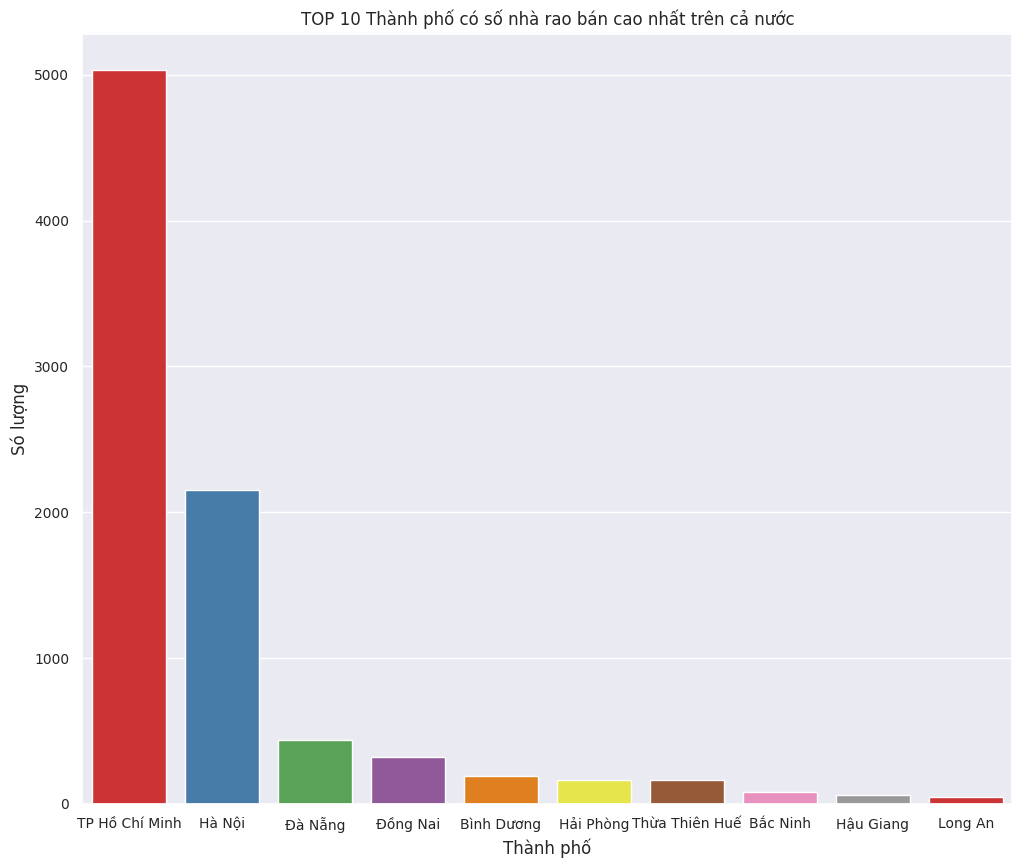

In [ ]:
display(housing["City"].value_counts())

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x=housing["City"], palette="Set1", order=housing["City"].value_counts().index[0:10])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Thành phố')
plt.ylabel('Só lượng')
plt.title('TOP 10 Thành phố có số nhà rao bán cao nhất trên cả nước')

Gò Vấp         754
Bình Thạnh     586
Bình Tân       560
Tân Bình       527
Thủ Đức        412
              ... 
Thái Nguyên      1
Nam Định         1
Sơn Tịnh         1
Hoa Lư           1
Chơn Thành       1
Name: District, Length: 138, dtype: int64

Text(0.5, 1.0, 'TOP 10 Quận/Huyện có số nhà rao bán cao nhất trên cả nước')

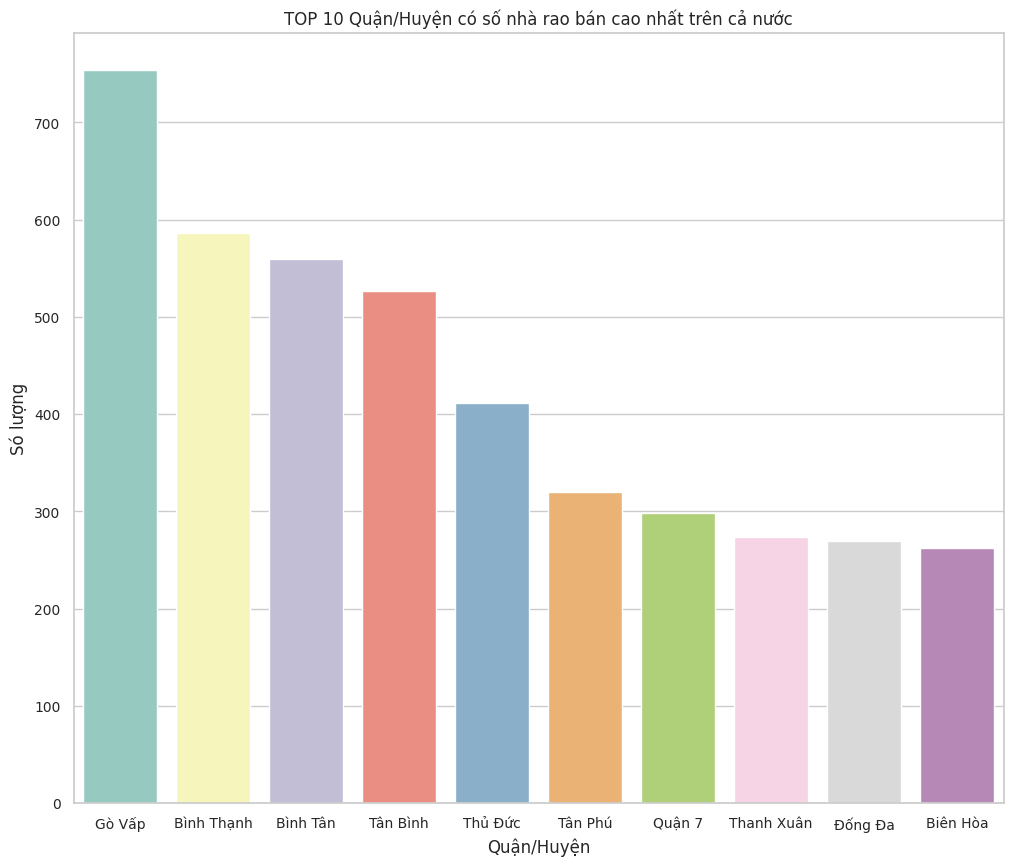

In [ ]:
display(housing["District"].value_counts())

plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(x=housing["District"], palette="Set3", order=housing["District"].value_counts().index[0:10])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Quận/Huyện')
plt.ylabel('Só lượng')
plt.title('TOP 10 Quận/Huyện có số nhà rao bán cao nhất trên cả nước')

Bán Nhà riêng      6441
Bán Nhà mặt phố    2064
Bán Nhà             361
Bán Luxury home       8
Bán Nhà cổ            5
Name: Type_of_selling, dtype: int64

Text(0.5, 1.0, 'Kiểu nhà')

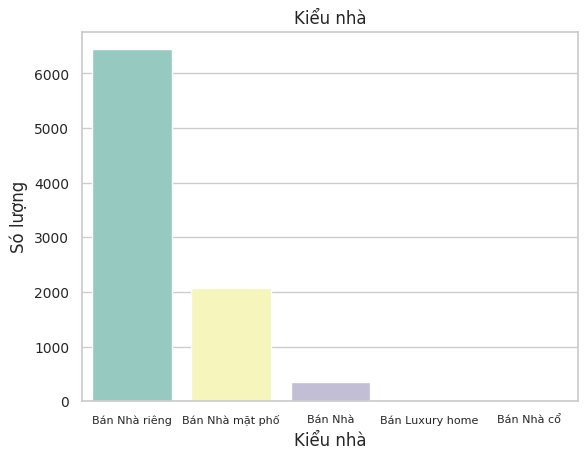

In [ ]:
display(housing["Type_of_selling"].value_counts())

sns.set(style="whitegrid")
ax = sns.countplot(x=housing["Type_of_selling"], palette="Set3", order = housing["Type_of_selling"].value_counts().index[0:5])
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.xlabel('Kiểu nhà')
plt.ylabel('Só lượng')
plt.title('Kiểu nhà')

Preprocessing - Feaure

In [ ]:
housing = housing.drop(['Title','Description','Convient','View','Time','Type_of_selling'], axis = 1)

In [ ]:
housing.head(10)

,Area,Bedroom,Floor,WC,Price,Date,District,City
0,45.0,-1,5,-1,0.00,2023-06-10 14:26:17,Long Biên,Hà Nội
1,30.0,3,4,3,3.58,2023-05-23 09:25:38,Hà Đông,Hà Nội
2,176.0,1,-1,1,37.00,2022-11-07 23:39:14,Ba Đình,Hà Nội
3,75.0,5,5,6,12.60,2022-09-07 05:05:15,Hoàng Mai,Hà Nội
4,60.0,2,-1,2,4.00,2023-05-29 16:40:39,Tân Phú,TP Hồ Chí Minh
5,32.0,-1,-1,-1,7.50,2023-05-31 12:03:06,Tây Hồ,Hà Nội
6,80.0,-1,5,-1,10.00,2023-05-05 22:54:38,Hoàng Mai,Hà Nội
7,44.0,2,-1,-1,4.95,2023-05-16 17:49:25,Bắc Từ Liêm,Hà Nội
8,65.0,3,2,4,42.90,2023-06-11 10:10:30,Quận 5,TP Hồ Chí Minh
9,135.0,-1,-1,-1,70.00,2023-06-11 10:18:20,Từ Sơn,Bắc Ninh


Hàm lấy tọa độ các tỉnh/thành phố và các quận/huyện trên cả nước

In [ ]:
def get_coordinates_from_api(district_name, province_name, api_key):
    url = f"https://api.geoapify.com/v1/geocode/search?text={district_name},{province_name},VietNam&format=json&apiKey={api_key}"
    response = requests.get(url)
    data = response.json()

    try:
        data['results'][0]
        coordinates = data['results'][0]['bbox']
        longitude, latitude = coordinates['lon1'], coordinates['lat1']
        print(latitude, longitude)
        return latitude, longitude
    except:
        print(district_name, province_name)
        print(data)
        return None

In [ ]:
coordinate_dict = {
    ('District 1', 'Ho Chi Minh City'): (10.7758439, 106.7009366),
    ('District 2', 'Ho Chi Minh City'): (10.7876769, 106.7492165),
}

In [ ]:
import requests

# Replace 'YOUR_API_KEY' with your actual API key
api_key = 'da8aadc31d3a47af8b75e94619f160b9'

# Example dataframe with 'District' and 'Province' columns
df = housing

# Create separate 'Latitude' and 'Longitude' columns
df['Latitude'] = None
df['Longitude'] = None

# Iterate over rows and retrieve coordinates
for index, row in df.iterrows():
    district = row['District']
    province = row['City']

    if (district, province) not in coordinate_dict:
        coordinate_dict[(district, province)] = get_coordinates_from_api(district, province, api_key)
    if coordinate_dict[(district, province)] == None:
        df.drop(index = index)
        continue
    longitude, latitude = coordinate_dict[(district, province)]

    df.at[index, 'Latitude'] = latitude
    df.at[index, 'Longitude'] = longitude


21.0401554 105.8653592
20.9698363 105.7745175
20.946341 105.760936
20.983773 105.849591
10.7307078 106.7248536
21.0641965 105.8218467
20.5645154 105.2848986
10.7461928 106.6505485
21.0679313375 105.913377106
10.764192 106.755324
10.7794703627 106.609111636
10.756368 106.644554
10.75306 106.73444
16.0263747 108.1665222
10.724754 106.556147
10.705888 106.677805
10.79667 106.66333
21.023833 105.823545
10.7403457 106.6979004
11.54331 107.3210131
20.854703 106.680061
10.748557 106.627838
10.888477 106.594891
20.8636587 106.6510316
10.866055 106.647584
20.989273 105.79994
9.8867045 106.301315
10.8186095 106.6032773
10.733814 106.610143
21.0288366 105.8028938
16.0329728 108.086564
21.0115747 105.855885
20.789178 106.676903
10.9397232 106.595
16.322695 107.4678438
11.0992959 106.5694448
20.983208 105.892628
10.748511 106.691167
10.9592354 106.6832033
10.771637 106.660335
11.54331 107.3210131
21.1729489 105.7264842
10.7920119 106.6817363
20.5645154 105.2848986
20.5645154 105.2848986
10.741676 1

In [ ]:
print(len(coordinate_dict))

144


Tìm và loại bỏ các quận/huyện, tỉnh/thành phố không lấy được tọa độ

In [ ]:
for key in coordinate_dict.keys():
    if coordinate_dict[key] is None:
        print(key)

('Hoài Đức', 'Hà Nội')
('Sa Pa', 'Lào Cai')
('Bàu Bàng', 'Bình Dương')
('Thanh Khê', 'An Giang')
('Thái Nguyên', 'Thái Nguyên')
('Quy Nhơn', 'Bình Định')
('Hớn Quản', 'Bình Phước')
('Cần Đước', 'Long An')


In [ ]:
for index, row in housing.iterrows():
    if row.isnull().any():
        print("Null values found in row:", row)
        housing.drop(index, inplace=True)

Null values found in row: Area                        33.0
Bedroom                       -1
Floor                          4
WC                            -1
Price                        2.4
Date         2023-05-01 09:38:08
District                Hoài Đức
City                      Hà Nội
Latitude                    None
Longitude                   None
Name: 1257, dtype: object
Null values found in row: Area                       216.0
Bedroom                       -1
Floor                          8
WC                            -1
Price                        0.0
Date         2023-06-10 14:26:17
District                   Sa Pa
City                     Lào Cai
Latitude                    None
Longitude                   None
Name: 1271, dtype: object
Null values found in row: Area                        75.0
Bedroom                        4
Floor                          7
WC                             7
Price                       14.0
Date         2023-04-26 17:39:32
District    

In [ ]:
housing['Latitude'] = pd.to_numeric(housing['Latitude'])
housing['Longitude'] = pd.to_numeric(housing['Longitude'])

In [ ]:
housing.to_csv("merged_data.csv")

In [ ]:
housing = pd.DataFrame(pd.read_csv('merged_data.csv'))

In [ ]:
housing = housing.drop(housing.columns[0], axis = 1)

In [ ]:
housing.head(20)

,Area,Bedroom,Floor,WC,Price,Date,District,City,Latitude,Longitude
0,45.0,-1,5,-1,0.00,2023-06-10 14:26:17,Long Biên,Hà Nội,105.865359,21.040155
1,30.0,3,4,3,3.58,2023-05-23 09:25:38,Hà Đông,Hà Nội,105.774518,20.969836
2,176.0,1,-1,1,37.00,2022-11-07 23:39:14,Ba Đình,Hà Nội,105.760936,20.946341
3,75.0,5,5,6,12.60,2022-09-07 05:05:15,Hoàng Mai,Hà Nội,105.849591,20.983773
4,60.0,2,-1,2,4.00,2023-05-29 16:40:39,Tân Phú,TP Hồ Chí Minh,106.724854,10.730708
5,32.0,-1,-1,-1,7.50,2023-05-31 12:03:06,Tây Hồ,Hà Nội,105.821847,21.064197
6,80.0,-1,5,-1,10.00,2023-05-05 22:54:38,Hoàng Mai,Hà Nội,105.849591,20.983773
7,44.0,2,-1,-1,4.95,2023-05-16 17:49:25,Bắc Từ Liêm,Hà Nội,105.284899,20.564515
8,65.0,3,2,4,42.90,2023-06-11 10:10:30,Quận 5,TP Hồ Chí Minh,106.650548,10.746193
9,135.0,-1,-1,-1,70.00,2023-06-11 10:18:20,Từ Sơn,Bắc Ninh,105.913377,21.067931


In [ ]:
housing = housing.drop(['City', 'District','Date'], axis = 1)

In [ ]:
housing = housing.astype(float)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8845 entries, 0 to 8844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       8845 non-null   float64
 1   Bedroom    8845 non-null   float64
 2   Floor      8845 non-null   float64
 3   WC         8845 non-null   float64
 4   Price      8845 non-null   float64
 5   Latitude   8845 non-null   float64
 6   Longitude  8845 non-null   float64
dtypes: float64(7)
memory usage: 483.8 KB


Thay thế những ô có giá trị là 0 và -1 bằng NaN

In [ ]:
housing = housing.replace([0, -1], np.nan)

#### Fill missing values bằng MICE

In [ ]:
# Specify the columns with missing data
columns_with_missing = ['Area', 'Bedroom', 'WC', 'Price','Floor']

# Create a copy of the data to preserve the original
data_filled = housing.copy()

# Apply MICE to fill missing data
imputer = IterativeImputer()
data_filled[columns_with_missing] = imputer.fit_transform(data_filled[columns_with_missing])

#### Xóa giá trị trùng lặp

In [ ]:
data_no_duplicates = data_filled.drop_duplicates()

# Print the DataFrame without duplicate rows
print(data_no_duplicates)

       Area    Bedroom     Floor         WC      Price    Latitude  Longitude
0      45.0   4.061540  5.000000   4.155988  12.543759  105.865359  21.040155
1      30.0   3.000000  4.000000   3.000000   3.580000  105.774518  20.969836
2     176.0   1.000000  3.115091   1.000000  37.000000  105.760936  20.946341
3      75.0   5.000000  5.000000   6.000000  12.600000  105.849591  20.983773
4      60.0   2.000000  2.644076   2.000000   4.000000  106.724854  10.730708
...     ...        ...       ...        ...        ...         ...        ...
8839  131.0  33.000000  6.000000  33.000000  23.500000  106.677805  10.705888
8840   48.0   3.983772  5.000000   4.089361   7.700000  105.799940  20.989273
8842    4.0   4.000000  2.965264   4.000000   8.200000  106.734440  10.753060
8843    9.5   3.000000  2.000000   3.000000   5.400000  106.734440  10.753060
8844   50.0   2.577799  1.000000   2.000000  48.000000  106.681736  10.792012

[7937 rows x 7 columns]


Xử lí outliers

In [ ]:
columns_to_check = ['Price', 'Area', 'WC', 'Bedroom', 'Floor']

# Define the outlier removal threshold (z-score)
z_score_threshold = 3

# Create a copy of the data to preserve the original
data_no_outliers = data_no_duplicates.copy()

# Remove outliers for each column
for column in columns_to_check:
    z_scores = np.abs((data_no_duplicates[column] - data_no_duplicates[column].mean()) / data_no_duplicates[column].std())
    data_no_outliers = data_no_outliers[z_scores <= z_score_threshold]

# Print the data without outliers
print(data_no_outliers)


       Area   Bedroom     Floor        WC      Price    Latitude  Longitude
0      45.0  4.061540  5.000000  4.155988  12.543759  105.865359  21.040155
1      30.0  3.000000  4.000000  3.000000   3.580000  105.774518  20.969836
2     176.0  1.000000  3.115091  1.000000  37.000000  105.760936  20.946341
3      75.0  5.000000  5.000000  6.000000  12.600000  105.849591  20.983773
4      60.0  2.000000  2.644076  2.000000   4.000000  106.724854  10.730708
...     ...       ...       ...       ...        ...         ...        ...
8838   18.0  3.501498  2.000000  3.309882   8.976230  106.683203  10.959235
8840   48.0  3.983772  5.000000  4.089361   7.700000  105.799940  20.989273
8842    4.0  4.000000  2.965264  4.000000   8.200000  106.734440  10.753060
8843    9.5  3.000000  2.000000  3.000000   5.400000  106.734440  10.753060
8844   50.0  2.577799  1.000000  2.000000  48.000000  106.681736  10.792012

[7576 rows x 7 columns]


In [ ]:
housing = data_no_outliers

In [ ]:
housing = housing.rename(columns={"Latitude": "longitude", "Longitude": "latitude"})

In [ ]:
housing

,Area,Bedroom,Floor,WC,Price,longitude,latitude
0,45.0,4.061540,5.000000,4.155988,12.543759,105.865359,21.040155
1,30.0,3.000000,4.000000,3.000000,3.580000,105.774518,20.969836
2,176.0,1.000000,3.115091,1.000000,37.000000,105.760936,20.946341
3,75.0,5.000000,5.000000,6.000000,12.600000,105.849591,20.983773
4,60.0,2.000000,2.644076,2.000000,4.000000,106.724854,10.730708
...,...,...,...,...,...,...,...
8838,18.0,3.501498,2.000000,3.309882,8.976230,106.683203,10.959235
8840,48.0,3.983772,5.000000,4.089361,7.700000,105.799940,20.989273
8842,4.0,4.000000,2.965264,4.000000,8.200000,106.734440,10.753060
8843,9.5,3.000000,2.000000,3.000000,5.400000,106.734440,10.753060


In [ ]:
import folium
from folium.plugins import HeatMap

# Create a map centered at a specific location
map_center = [14.0583, 108.2772]  # Specify the center of the map
zoom_level = 10  # Adjust the zoom level as desired
m = folium.Map(location=map_center, zoom_start=zoom_level)

# Create a DataFrame with latitude and longitude columns
# Replace 'df' with your actual dataframe name
# Replace 'lat_column' and 'long_column' with the corresponding column names in your dataframe
locations_df = housing[['latitude', 'longitude']].copy()

# Drop any rows with missing values
locations_df.dropna(inplace=True)

# Convert the latitude and longitude values to a list of tuples
locations = locations_df.values.tolist()

# Create a heatmap layer using the kernel density estimation
HeatMap(locations).add_to(m)

# Display the map
m

## III. Methodology

                Model      RMSE       MAE  R-squared  explained_variance_score
0             XGBoost  5.514690  2.785656   0.566358                  0.566667
1     LGBM Regression  5.803110  3.011475   0.519813                  0.519919
2       Random Forest  5.895123  2.812442   0.504464                  0.504545
3  Bagging Regression  6.177815  2.926177   0.455799                  0.455802
4   Gradient Boosting  6.300186  3.606352   0.434027                  0.434318
5       Decision Tree  8.072780  3.610132   0.070744                  0.072892
6             LassoCV  8.096280  4.927640   0.065326                  0.066108
7    Ridge Regression  8.096790  4.921731   0.065208                  0.066008
8   Linear Regression  8.096802  4.921727   0.065206                  0.066005
9    Lasso Regression  8.216553  5.136402   0.037350                  0.037986


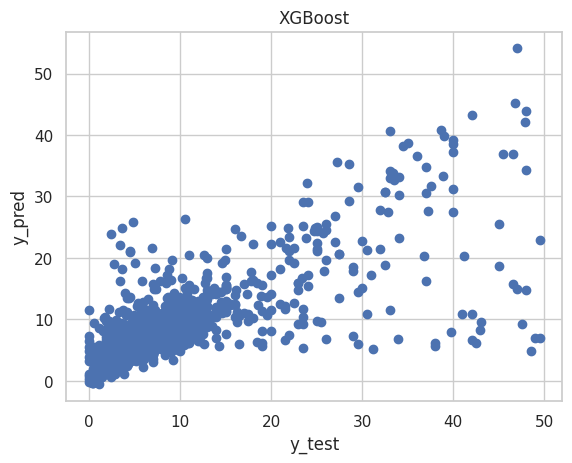

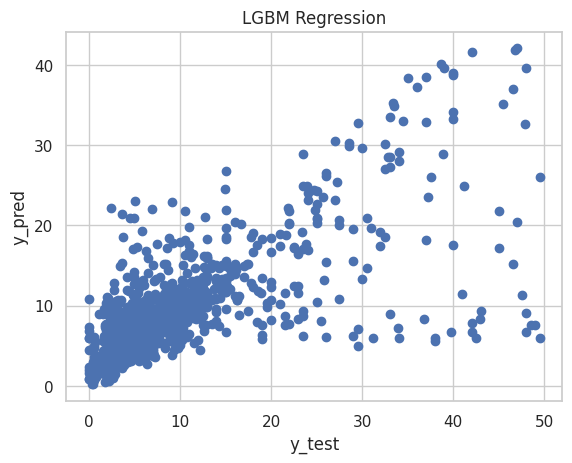

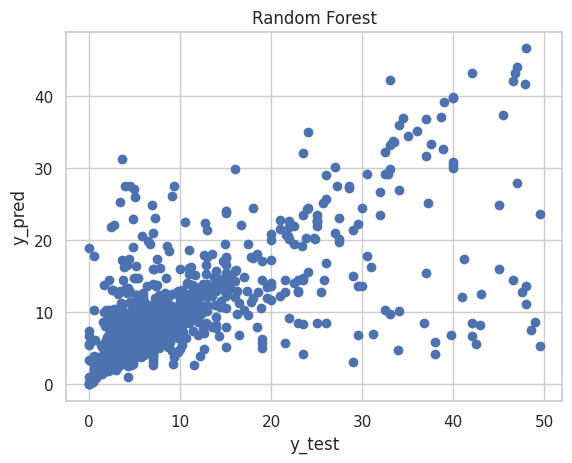

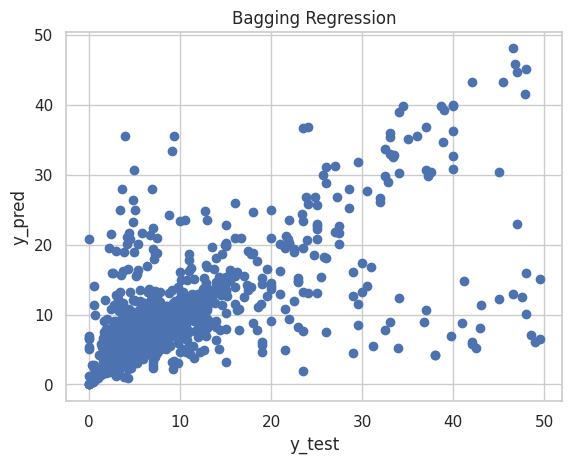

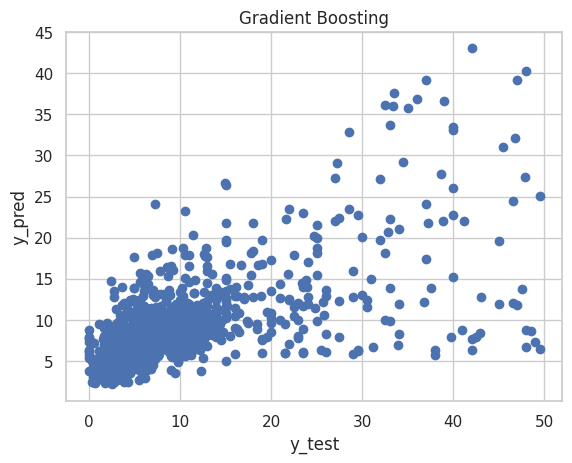

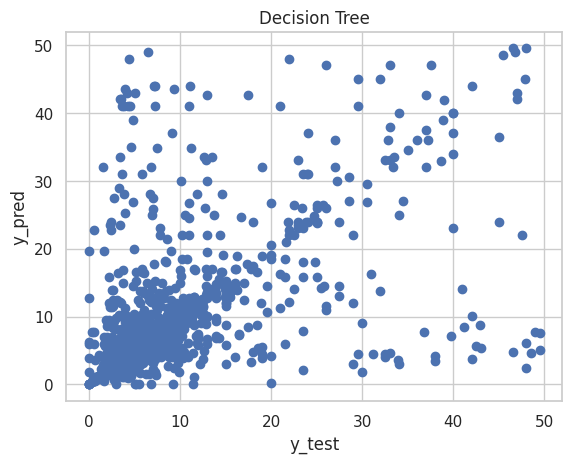

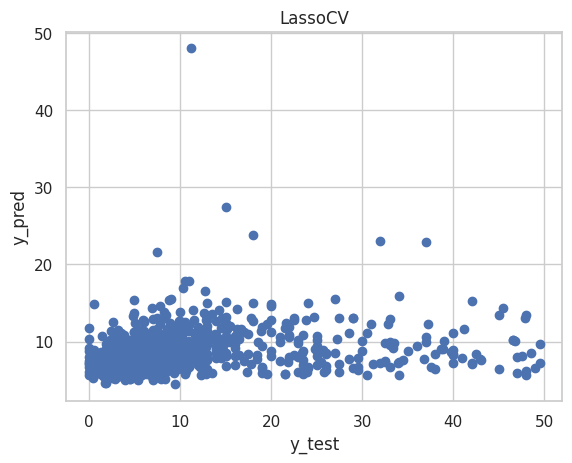

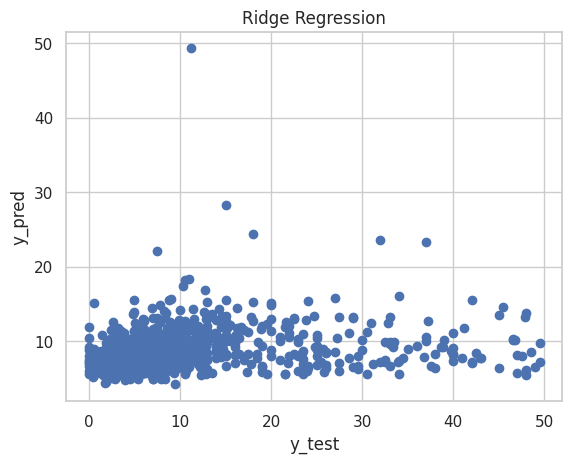

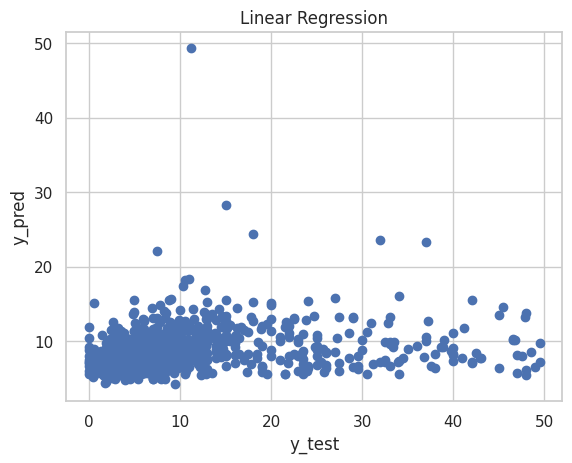

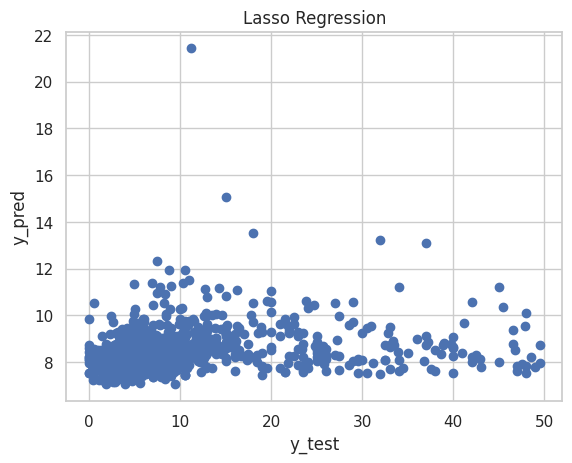

In [ ]:

# Load the preprocessed data from CSV file
data = housing

# data = data.sample(frac=1).reset_index(drop=True)

# Extract the features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Create a dictionary to store the models and their corresponding metrics
models = {
    'XGBoost' : XGBRegressor(),
    'LGBM Regression': lgb.LGBMRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Bagging Regression': BaggingRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'LassoCV': LassoCV(),
    'Ridge Regression': Ridge(),
    'Linear Regression': LinearRegression(),
    'Lasso Regression' : Lasso()

}

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R-squared'])

# Iterate over the models dictionary
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
# Plot heading
    plt.xlabel('y_test', fontsize=12)                          # X-label
    plt.ylabel('y_pred', fontsize=12)
    plt.title(model_name)
    # Evaluate the model using different metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    # Append the results to the DataFrame
    results = results.append({
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R-squared': r2,
        'explained_variance_score': evs
    }, ignore_index=True)

# Print the results table
print(results)


In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 8844
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       7576 non-null   float64
 1   Bedroom    7576 non-null   float64
 2   Floor      7576 non-null   float64
 3   WC         7576 non-null   float64
 4   longitude  7576 non-null   float64
 5   latitude   7576 non-null   float64
dtypes: float64(6)
memory usage: 414.3 KB
None


Text(0, 0.5, 'y_pred')

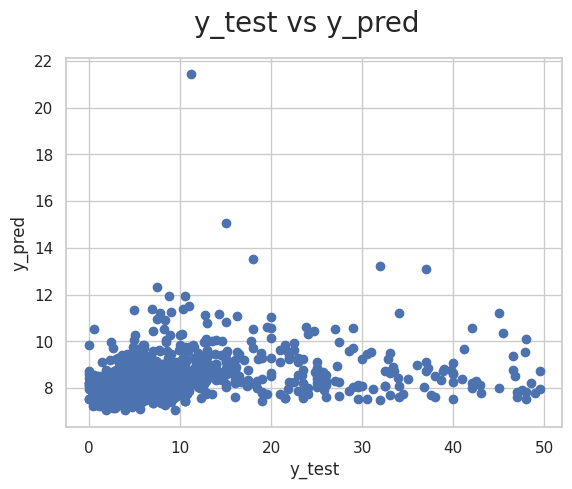

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=12)                          # X-label
plt.ylabel('y_pred', fontsize=12)